In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from konlpy.tag import Okt
from collections import Counter
from wordcloud import WordCloud
from matplotlib import rc

# Windows 예제
rc('font', family='Malgun Gothic')  # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

In [ ]:
file_path_sushikoji = "C:/Users/bisu/Documents/GitHub/crawling/catch_table/sushikoji_reviews.csv"
df_sushikoji = pd.read_csv(file_path_sushikoji)


In [15]:
# 1. 리뷰 점수 분포 - 히스토그램
def visualize_rating_histogram(data):
    plt.figure(figsize=(8, 5))
    plt.hist(data['rating'], bins=5, range=(1, 5), color='skyblue', edgecolor='black', alpha=0.7)
    plt.title('리뷰 점수 분포 (히스토그램)')
    plt.xlabel('평점')
    plt.ylabel('리뷰 수')
    plt.xticks([1, 2, 3, 4, 5])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()



In [14]:
# 2. 리뷰 작성 날짜별 리뷰 수 - 라인 차트 - 날짜 데이터 추후 추가
def visualize_review_trends(data):
    data['date'] = pd.to_datetime(data['content'].dropna().apply(lambda x: str(x)[:10]), errors='coerce')
    review_by_date = data.groupby(data['date'])['rating'].count()
    plt.figure(figsize=(12, 6))
    plt.plot(review_by_date.index, review_by_date.values, marker='o', color='orange')
    plt.title('리뷰 작성 날짜별 리뷰 수')
    plt.xlabel('날짜')
    plt.ylabel('리뷰 수')
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

In [12]:
# 3. 긍정/중립/부정 리뷰 비율 - 도넛 차트
def visualize_sentiment_donut(data):
    data['sentiment'] = data['rating'].apply(lambda x: '긍정' if x >= 4 else ('보통' if x == 3 else '부정'))
    sentiment_counts = data['sentiment'].value_counts()
    plt.figure(figsize=(6, 6))
    plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))
    plt.title('긍정/중립/부정 리뷰 비율 (도넛 차트)')
    plt.show()

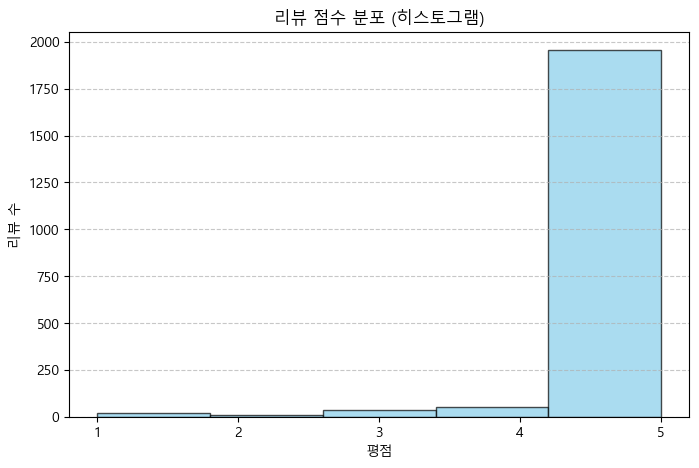

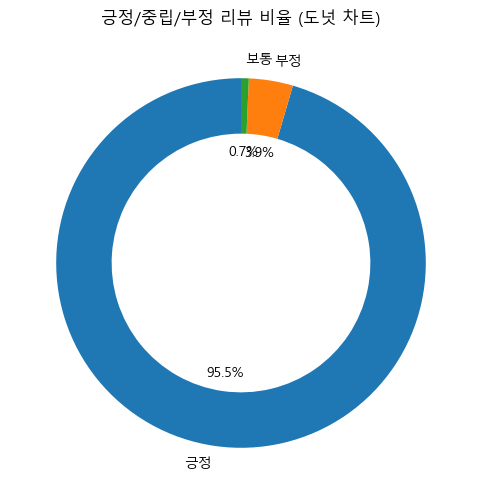

In [16]:
# Execute the visualizations
visualize_rating_histogram(df_sushikoji)
visualize_sentiment_donut(df_sushikoji)